# Machine Learning Master Notes 12 - Learning Curve and Learning Rate 

## Learning Curve & Learning Rate

### Prepare Environment

In [1]:
%matplotlib inline
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib import cm

# SciKit Learn Regression Model
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

# SciKit Learn Pre-processing and Feature Scaling
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

# The following file contain the finalized gradient descent, cost function program 
import MyRegressionProgramV1 as my

### Prepare Data

In [2]:
df = pd.read_csv('./data/housing_one_var.csv')
df.head()


,sqft,price
0,2104,399900
1,1600,329900
2,2400,369000
3,1416,232000
4,3000,539900


In [3]:
x_train = df['sqft']
x_train.head()

0    2104
1    1600
2    2400
3    1416
4    3000
Name: sqft, dtype: int64

In [4]:
y_train = df['price']
y_train.head()

0    399900
1    329900
2    369000
3    232000
4    539900
Name: price, dtype: int64

In [5]:
df2 = pd.read_csv('./data/housing_two_var.txt')
df2.head()

,sqft,rm,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [6]:
y2_train = df2['price']
y2_train.head()

0    399900
1    329900
2    369000
3    232000
4    539900
Name: price, dtype: int64

In [7]:
X2_train = df2[['sqft','rm']]
X2_train.head()

,sqft,rm
0,2104,3
1,1600,3
2,2400,3
3,1416,2
4,3000,4


## Multiple Linear Regression: Cost Function and Gradient Descent

Hypothesis: $$f_{\vec{w},b}(\vec{X}^{(i)})=b + \sum\limits_{j=0}^{n-1} \vec{w}_{j}\vec{X}_{j}^{(i)}$$


Cost Function:	$$J(\vec w, b) = \frac{1}{2m}   \sum\limits_{i=0}^{m-1} (f_{\vec w,b}(\vec{X}^{(i)})-\vec y^{(i)})^{2}$$ 
$$J(\vec w, b) = \frac{1}{2m} \sum\limits_{i=0}^{m-1} \left(\left(b + \sum\limits_{j=0}^{n-1} \vec w_{j} \vec X_{j}^{(i)} \right)-\vec y^{(i)}\right)^{2}$$
$$J(\vec w, b) = \frac{1}{2m} \sum\limits_{i=0}^{m-1} \left(\left(b + \vec X^{(i)} \cdot \vec w \right)-\vec y^{(i)}\right)^{2}$$
$$$$
Gradient Descent Algorithm: $$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  \vec w &= \vec w -  \alpha \frac{\partial J(\vec{w},b)}{\partial \vec{w}}  \; \newline 
 b &= b -  \alpha \frac{\partial J(\vec{w},b)}{\partial b}  \newline \rbrace
\end{align*}$$


Partial Derivatives: $$
\begin{align}
\frac{\partial J(\vec{w},b)}{\partial \vec{w}}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\vec{w},b}(\vec{X}^{(i)}) - y^{(i)})\vec{X}^{(i)} \\
  \frac{\partial J(\vec{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\vec{w},b}(\vec{X}^{(i)}) - y^{(i)}) \\
\end{align}
$$

Full Implementation of Gradient Descent:
$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  \vec{w} &= \vec{w} -  \alpha \frac{1}{m} \sum\limits_{i = 0}^{m-1} ((\vec{X}^{(i)}\cdot \vec{w} + b) - y^{(i)})\vec{X}^{(i)}  \; \newline 
 b &= b -  \alpha \frac{1}{m} \sum\limits_{i = 0}^{m-1} ((\vec{X}^{(i)}\cdot \vec{w} + b) - y^{(i)})  \newline \rbrace
\end{align*}$$

## What is Learning Curve

**Learning curve** is the chart that shows the **relationship between the cost and each iterations**. It will informed us if the cost did reduce on every iterations. If the cost is increase instead of reducing, then that could be something wrong with the code or the parameters set.

## Adjusting Iterations Using Learning Curve (One Feature)

In gradient descent, we can use learning curve to see how our cost converge. Learning curve is the curve that plot the cost verses number of iterations.

In [8]:
x_train1 = x_train.to_numpy().reshape(-1,1)
y_train1 = y_train.to_numpy().reshape(-1,1)

In [9]:
x_norm1, avg1, stddev1 = my.std_norm(x_train1)
coef1, intercept1, cost_history1, w_history1, b_history1 = my.compute_gradient_descent(x_norm1, y_train1, printProgress=True, storeHistory=True)

iteration 0: cost = 6.4327e+10: intercept = 3.4041e+03: weights = [[1057.64133493]]
iteration 1000: cost = 2.0581e+09: intercept = 3.4040e+05: weights = [[105759.61318294]]
iteration 2000: cost = 2.0581e+09: intercept = 3.4041e+05: weights = [[105764.13329767]]
iteration 3000: cost = 2.0581e+09: intercept = 3.4041e+05: weights = [[105764.13349281]]
iteration 4000: cost = 2.0581e+09: intercept = 3.4041e+05: weights = [[105764.13349281]]
iteration 5000: cost = 2.0581e+09: intercept = 3.4041e+05: weights = [[105764.13349281]]
iteration 6000: cost = 2.0581e+09: intercept = 3.4041e+05: weights = [[105764.13349281]]
iteration 7000: cost = 2.0581e+09: intercept = 3.4041e+05: weights = [[105764.13349281]]
iteration 8000: cost = 2.0581e+09: intercept = 3.4041e+05: weights = [[105764.13349281]]
iteration 9000: cost = 2.0581e+09: intercept = 3.4041e+05: weights = [[105764.13349281]]
iteration 9999: Last cost = 2.0581e+09: intercept = 3.4041e+05: weights = [[105764.13349281]]
best w [[105764.1335]

**This shows that data converge before iterations 2000**

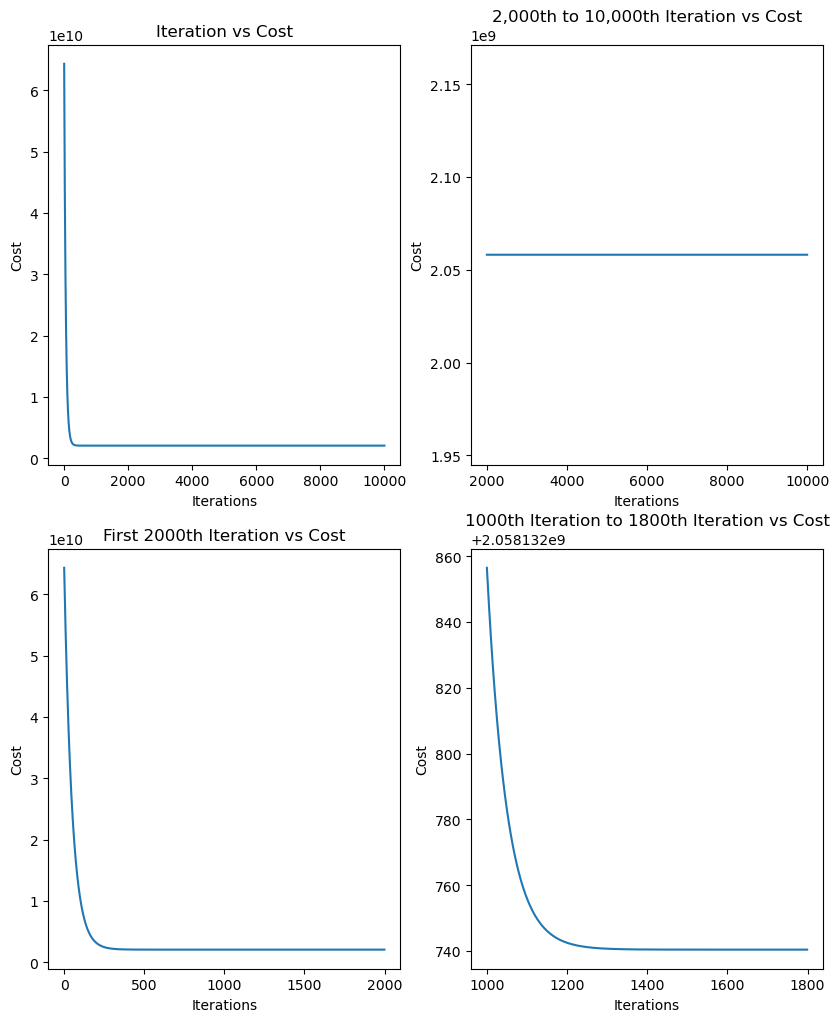

In [11]:
plt.close('all')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 12))
ax1.plot(cost_history1)
ax1.set_title('Iteration vs Cost')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Cost')
yplot2 = cost_history1[2000:]
ax2.plot(2000 + np.arange(len(yplot2)), yplot2)
ax2.set_title('2,000th to 10,000th Iteration vs Cost')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Cost')
yplot3 = cost_history1[:2000]
ax3.plot(np.arange(len(yplot3)), yplot3)
ax3.set_title('First 2000th Iteration vs Cost')
ax3.set_xlabel('Iterations')
ax3.set_ylabel('Cost')
yplot4 = cost_history1[1000:1800]
ax4.plot(1000+np.arange(len(yplot4)), yplot4)
ax4.set_title('1000th Iteration to 1800th Iteration vs Cost')
ax4.set_xlabel('Iterations')
ax4.set_ylabel('Cost')
plt.show()

From the chart we can conclude that gradient descent converge around 1500th to 1800th iterations.

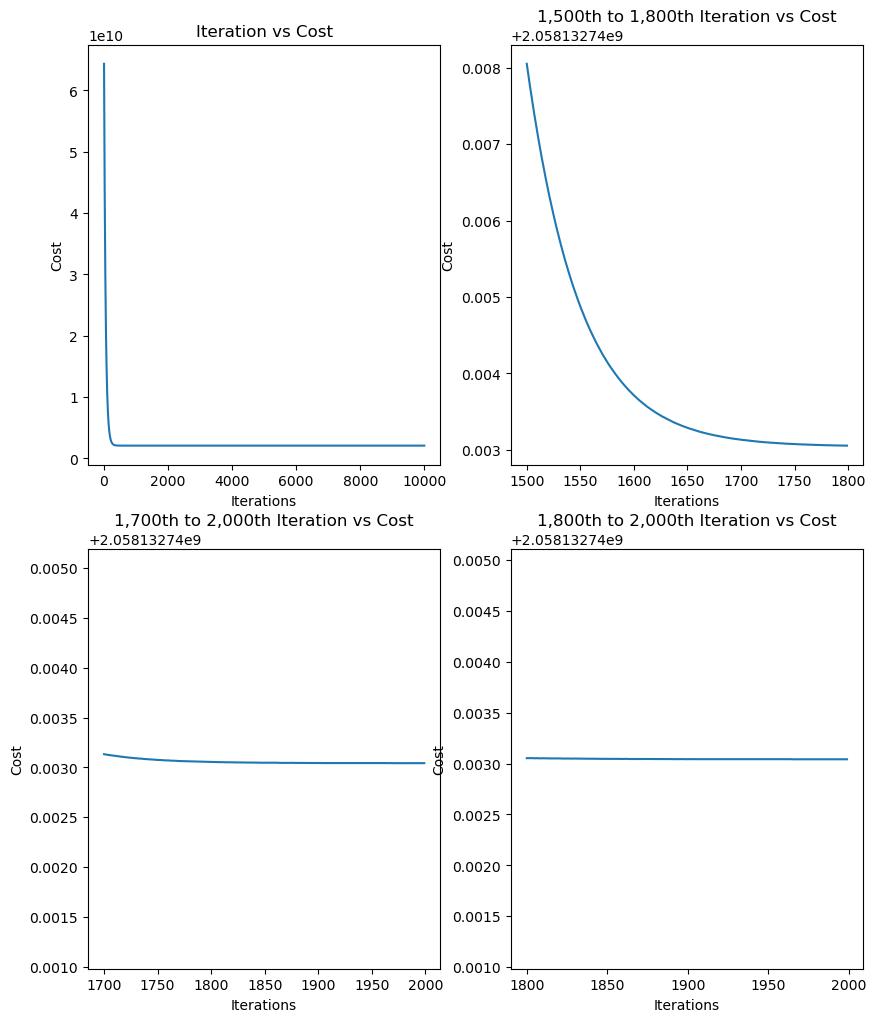

In [12]:
plt.close('all')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 12))
ax1.plot(cost_history1)
ax1.set_title('Iteration vs Cost')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Cost')
yplot2 = cost_history1[1500:1800]
ax2.plot(1500 + np.arange(len(yplot2)), yplot2)
ax2.set_title('1,500th to 1,800th Iteration vs Cost')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Cost')
yplot3 = cost_history1[1700:2000]
ax3.plot(1700+np.arange(len(yplot3)), yplot3)
ax3.set_title('1,700th to 2,000th Iteration vs Cost')
ax3.set_xlabel('Iterations')
ax3.set_ylabel('Cost')
yplot4 = cost_history1[1800:2000]
ax4.plot(1800+np.arange(len(yplot4)), yplot4)
ax4.set_title('1,800th to 2,000th Iteration vs Cost')
ax4.set_xlabel('Iterations')
ax4.set_ylabel('Cost')
plt.show()

Based on the chart above we can be confidence that cost converge around **1800th** iterations.

Thus, we can improve the speed of the learning algorithm as the reduction in cost is too small for the additional processing.

In [13]:
coef2, intercept2, cost_history2, w_history2, b_history2 = my.compute_gradient_descent(x_norm1, y_train1, iterations= 1800, printProgress=True, 
                                                                                       printProgressRate=10, storeHistory=True)

iteration 0: cost = 6.4327e+10: intercept = 3.4041e+03: weights = [[1057.64133493]]
iteration 10: cost = 5.2988e+10: intercept = 3.5628e+04: weights = [[11069.45884817]]
iteration 20: cost = 4.3714e+10: intercept = 6.4771e+04: weights = [[20123.96714541]]
iteration 30: cost = 3.6129e+10: intercept = 9.1127e+04: weights = [[28312.70214745]]
iteration 40: cost = 2.9925e+10: intercept = 1.1496e+05: weights = [[35718.44730029]]
iteration 50: cost = 2.4851e+10: intercept = 1.3652e+05: weights = [[42416.0704686]]
iteration 60: cost = 2.0700e+10: intercept = 1.5602e+05: weights = [[48473.28080719]]
iteration 70: cost = 1.7306e+10: intercept = 1.7365e+05: weights = [[53951.31326197]]
iteration 80: cost = 1.4529e+10: intercept = 1.8959e+05: weights = [[58905.54762038]]
iteration 90: cost = 1.2258e+10: intercept = 2.0401e+05: weights = [[63386.06836953]]
iteration 100: cost = 1.0401e+10: intercept = 2.1706e+05: weights = [[67438.17102176]]
iteration 110: cost = 8.8818e+09: intercept = 2.2885e+05

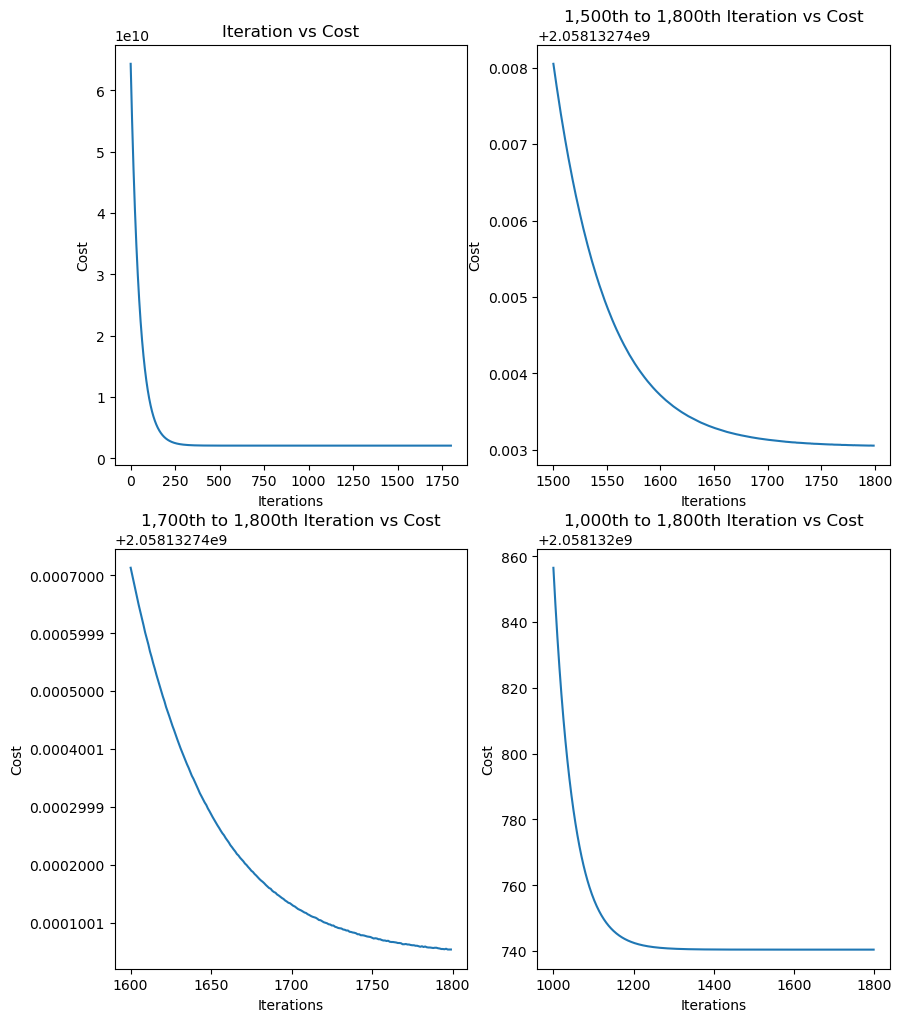

In [14]:
plt.close('all')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 12))
ax1.plot(cost_history2)
ax1.set_title('Iteration vs Cost')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Cost')
yplot2 = cost_history2[1500:]
ax2.plot(1500 + np.arange(len(yplot2)), yplot2)
ax2.set_title('1,500th to 1,800th Iteration vs Cost')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Cost')
yplot3 = cost_history2[1600:]
ax3.plot(1600+np.arange(len(yplot3)), yplot3)
ax3.set_title('1,700th to 1,800th Iteration vs Cost')
ax3.set_xlabel('Iterations')
ax3.set_ylabel('Cost')
yplot4 = cost_history2[1000:]
ax4.plot(1000+np.arange(len(yplot4)), yplot4)
ax4.set_title('1,000th to 1,800th Iteration vs Cost')
ax4.set_xlabel('Iterations')
ax4.set_ylabel('Cost')
plt.show()

<div class="alert alert-block alert-info">

**Important Note:**

- **If the cost increases then it indicates that it could be a bug or the learning rate is too high.** 
- **Different application produces different cost convergence, some data converge within 50 iterations whereas some converge at longer iterations.**
- **Alternative, we can use epsilons (threshold) to indicate when we can stop the training. For example, we can say that if the reduction in cost is smaller than 0.001, then the algorithm can stop gradient descent.**

</div>

## Adjusting Iterations Using Learning Curve (Two Features)

In [15]:
X2_train = df2[['sqft','rm']]
y2_train = df2['price']
X2_train2 = X2_train.to_numpy()
y2_train2 = y2_train.to_numpy().reshape(-1,1)

In [16]:
# Normal data
lr2 = LinearRegression().fit(X2_train2, y2_train2)
print('w',lr2.coef_)
print('b',lr2.intercept_)

w [[  139.21067402 -8738.01911233]]
b [89597.9095428]


In [17]:
std_scaler2 = StandardScaler()
normalized_arr2 = std_scaler2.fit_transform(X2_train2)
reg2 = LinearRegression().fit(normalized_arr2, y2_train2)
print('w',reg2.coef_)
print('b',reg2.intercept_)

w [[109447.79646964  -6578.35485416]]
b [340412.65957447]


In [18]:
X2_norm2, avg2, stddev2 = my.std_norm(X2_train2)
coef2, intercept2, cost_history2, _, _ = my.compute_gradient_descent(X2_norm2, y2_train2, printProgress=True, storeHistory=True)

iteration 0: cost = 6.4298e+10: intercept = 3.4041e+03: weights = [[1057.64133493  547.08821756]]
iteration 1000: cost = 2.0435e+09: intercept = 3.4040e+05: weights = [[108745.75920605  -5876.33262918]]
iteration 2000: cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109439.26349627  -6569.82188079]]
iteration 3000: cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109447.69275376  -6578.25113828]]
iteration 4000: cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109447.795209    -6578.35359352]]
iteration 5000: cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109447.79645432  -6578.35483884]]
iteration 6000: cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109447.79646946  -6578.35485398]]
iteration 7000: cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109447.79646964  -6578.35485416]]
iteration 8000: cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109447.79646964  -6578.35485416]]
iteration 9000: cost = 2.0433e+09: intercept = 3.4041e+05: wei

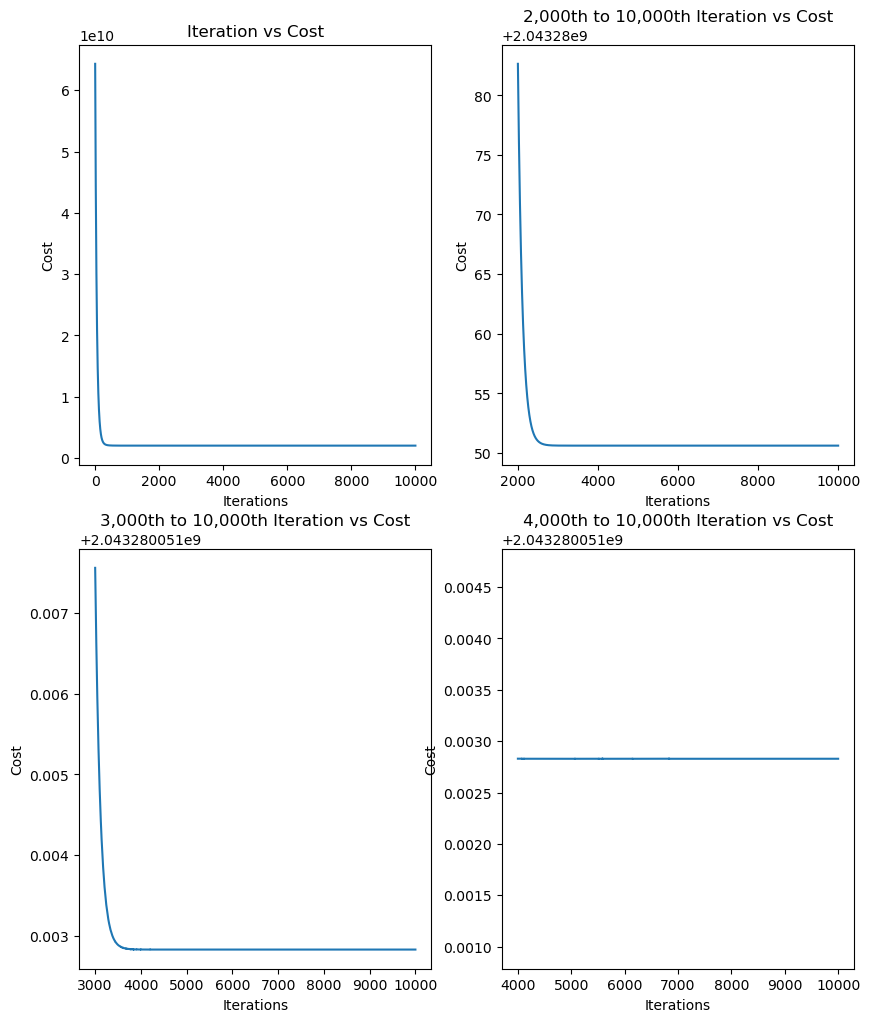

In [20]:
plt.close('all')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 12))
ax1.plot(cost_history2)
ax1.set_title('Iteration vs Cost')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Cost')
yplot2 = cost_history2[2000:]
ax2.plot(2000 + np.arange(len(yplot2)), yplot2)
ax2.set_title('2,000th to 10,000th Iteration vs Cost')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Cost')
yplot3 = cost_history2[3000:]
ax3.plot(3000+np.arange(len(yplot3)), yplot3)
ax3.set_title('3,000th to 10,000th Iteration vs Cost')
ax3.set_xlabel('Iterations')
ax3.set_ylabel('Cost')
yplot4 = cost_history2[4000:]
ax4.plot(4000+np.arange(len(yplot4)), yplot4)
ax4.set_title('4,000th to 10,000th Iteration vs Cost')
ax4.set_xlabel('Iterations')
ax4.set_ylabel('Cost')
plt.show()

From the chart above, we know that the cost converge before 4000 iterations. Next, we trained the data with only 4000 iterations. It should produce the same result.

In [21]:
coef2, intercept2, cost_history2, _, _ = my.compute_gradient_descent(X2_norm2, y2_train2, iterations= 4000, printProgress=True, 
                                                                     printProgressRate=500, storeHistory=True)

iteration 0: cost = 6.4298e+10: intercept = 3.4041e+03: weights = [[1057.64133493  547.08821756]]
iteration 500: cost = 2.0636e+09: intercept = 3.3820e+05: weights = [[103060.57737633   -230.15986939]]
iteration 1000: cost = 2.0435e+09: intercept = 3.4040e+05: weights = [[108745.75920605  -5876.33262918]]
iteration 1500: cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109370.39878515  -6500.95717547]]
iteration 2000: cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109439.26349627  -6569.82188079]]
iteration 2500: cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109446.85572267  -6577.41410719]]
iteration 3000: cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109447.69275376  -6578.25113828]]
iteration 3500: cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109447.78503513  -6578.34341965]]
iteration 3999: Last cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109447.79520343  -6578.35358795]]
best w [[109447.7952]
 [ -6578.3536]]
best b 340412.6596


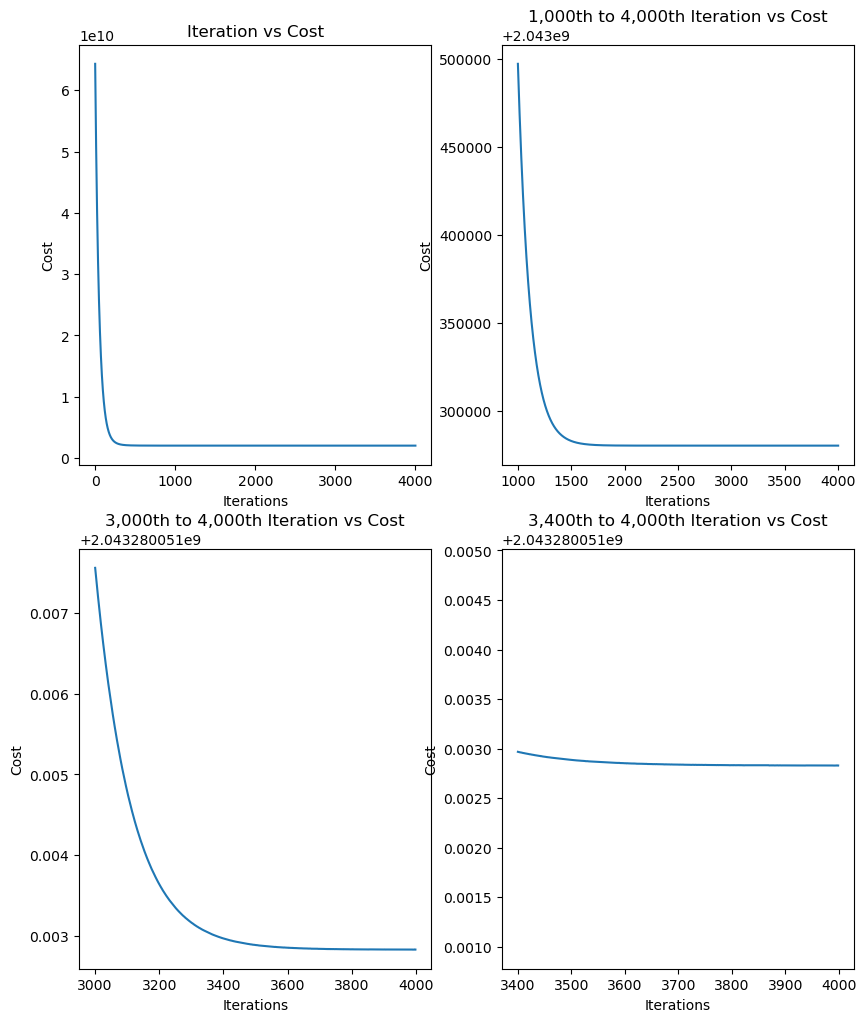

In [23]:
plt.close('all')
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 12))
ax1.plot(cost_history2)
ax1.set_title('Iteration vs Cost')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Cost')
yplot2 = cost_history2[1000:]
ax2.plot(1000 + np.arange(len(yplot2)), yplot2)
ax2.set_title('1,000th to 4,000th Iteration vs Cost')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Cost')
yplot3 = cost_history2[3000:]
ax3.plot(3000+np.arange(len(yplot3)), yplot3)
ax3.set_title('3,000th to 4,000th Iteration vs Cost')
ax3.set_xlabel('Iterations')
ax3.set_ylabel('Cost')
yplot4 = cost_history2[3400:]
ax4.plot(3400+np.arange(len(yplot4)), yplot4)
ax4.set_title('3,400th to 4,000th Iteration vs Cost')
ax4.set_xlabel('Iterations')
ax4.set_ylabel('Cost')
plt.show()

From the learning curve above, we can see where the cost converge and adjust the iterations accordingly so that the gradient descent runs faster.

In [24]:
X2_norm2, avg2, stddev2 = my.std_norm(X2_train2)
coef2, intercept2, cost_history2, _, _ = my.compute_gradient_descent(X2_norm2, y2_train2, iterations= 4000, printProgress=True, 
                                                                     printProgressRate=500, storeHistory=True)

iteration 0: cost = 6.4298e+10: intercept = 3.4041e+03: weights = [[1057.64133493  547.08821756]]
iteration 500: cost = 2.0636e+09: intercept = 3.3820e+05: weights = [[103060.57737633   -230.15986939]]
iteration 1000: cost = 2.0435e+09: intercept = 3.4040e+05: weights = [[108745.75920605  -5876.33262918]]
iteration 1500: cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109370.39878515  -6500.95717547]]
iteration 2000: cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109439.26349627  -6569.82188079]]
iteration 2500: cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109446.85572267  -6577.41410719]]
iteration 3000: cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109447.69275376  -6578.25113828]]
iteration 3500: cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109447.78503513  -6578.34341965]]
iteration 3999: Last cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109447.79520343  -6578.35358795]]
best w [[109447.7952]
 [ -6578.3536]]
best b 340412.6596


In [25]:
help(my.reverse_bw_std_norm)

Help on function reverse_bw_std_norm in module MyRegressionProgramV1:

reverse_bw_std_norm(coef, intercept, avg, stddev)
    The following is to reverse the coeficient and intercept after using std_norm.
    Please use the same mean and std deviation from std_norm
    This function can use for one feature or multiple features regression
    
    INPUT:
    coef = The weights / coefficient of the trained dataset
    intercept = The intercept of the trained dataset
    avg = The average return from the function std_norm
    stddev = The standard deviation from the function std_norm
    
    RETURN:
    or_coef_gd = The weights / coefficient in un-scaled form
    or_intercept_gd = The intercept in un-scaled form



In [26]:
coef_or2, intercept_or2 = my.reverse_bw_std_norm(coef2, intercept2, avg2, stddev2)

In [27]:
coef_or2

array([[  139.21067241],
       [-8738.01743042]])

In [28]:
intercept_or2

89597.90743297458

In [29]:
myAsk = np.array([2800,2]).reshape((1,2))

In [30]:
my.prediction(myAsk, intercept_or2, coef_or2)

array([[461911.75531197]])

In [31]:
lr2.predict(myAsk)

array([[461911.75856749]])

## Learning Rate Review

In the gradient descent below, there is an additional component known as $\alpha$, a.k.a **learning rate**:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w}  \; \newline 
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$

This component $\alpha$ is used to control how big each step size is. For example, assuming  derivatives $= 0.8$ and $w = 5$, 
$$$$
If $\alpha = 1$, then:
$$w = w - \alpha (derivatives)$$
$$w = 5 - 1 * 0.8$$
$$w = 4.2$$

If $\alpha = 0.1$, then:
$$w = 5 - 0.1 * 0.8$$
$$w = 5 - 0.08$$
$$w = 4.92$$

As you can see, $\alpha$ makes `w` increase\decrease faster. The smaller the $\alpha$, the smaller the step size.

## Adjusting Learning Rate $\alpha$ Using Simple Data

In [32]:
x_train3 = np.array([1.,2.,3.]).reshape(-1,1)
y_train3 = np.array([1.,2.,3.]).reshape(-1,1)

In [33]:
coef3, intercept3, cost_history3, _, _ = my.compute_gradient_descent(x_train3, y_train3, printProgress=True, storeHistory=True)

iteration 0: cost = 2.0827e+00: intercept = 2.0000e-02: weights = [[0.04666667]]
iteration 1000: cost = 8.7712e-04: intercept = 1.1058e-01: weights = [[0.95135473]]
iteration 2000: cost = 7.9144e-05: intercept = 3.3217e-02: weights = [[0.98538767]]
iteration 3000: cost = 7.1413e-06: intercept = 9.9780e-03: weights = [[0.99561067]]
iteration 4000: cost = 6.4437e-07: intercept = 2.9972e-03: weights = [[0.99868151]]
iteration 5000: cost = 5.8142e-08: intercept = 9.0033e-04: weights = [[0.99960394]]
iteration 6000: cost = 5.2463e-09: intercept = 2.7045e-04: weights = [[0.99988103]]
iteration 7000: cost = 4.7338e-10: intercept = 8.1238e-05: weights = [[0.99996426]]
iteration 8000: cost = 4.2713e-11: intercept = 2.4403e-05: weights = [[0.99998927]]
iteration 9000: cost = 3.8541e-12: intercept = 7.3302e-06: weights = [[0.99999678]]
iteration 9999: Last cost = 3.4860e-13: intercept = 2.2045e-06: weights = [[0.99999903]]
best w [[1.]]
best b 0.0


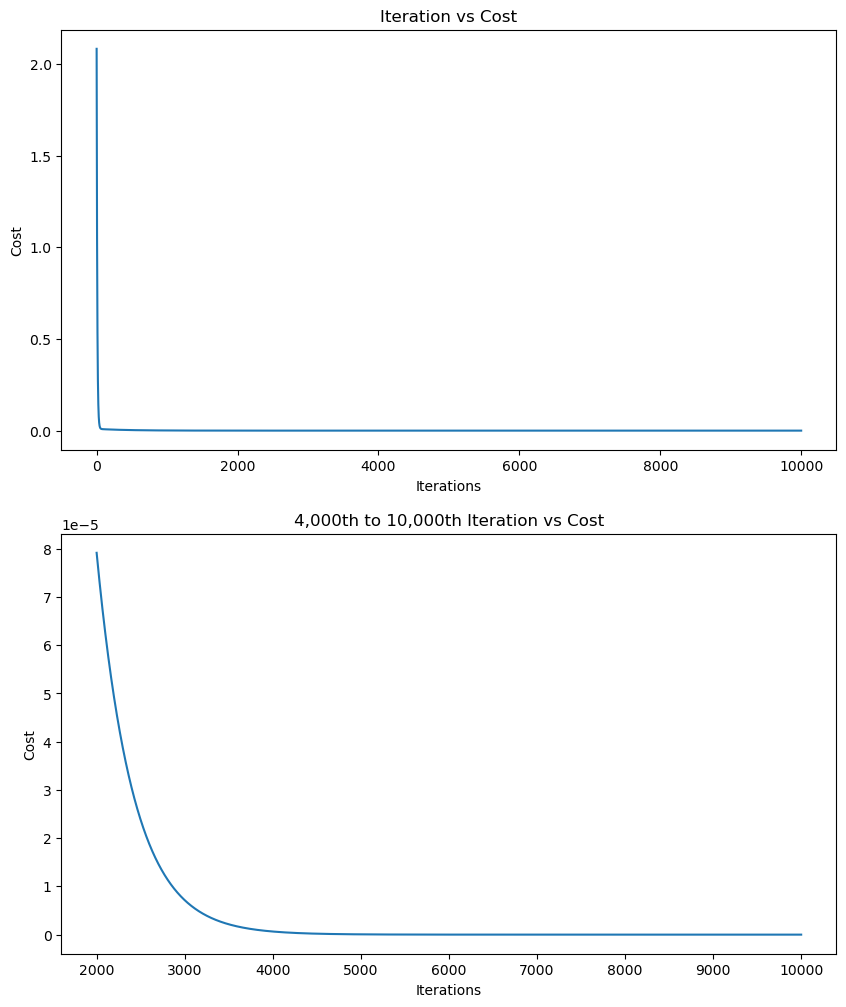

In [35]:
plt.close('all')
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 12))
ax1.plot(cost_history3)
ax1.set_title('Iteration vs Cost')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Cost')
yplot2 = cost_history3[2000:]
ax2.plot(2000 + np.arange(len(yplot2)), yplot2)
ax2.set_title('4,000th to 10,000th Iteration vs Cost')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Cost')
plt.show()

From the chart, we cost converge around 4000 to 5000 iterations. First,let us adjust the iteration to improve speed.

In [36]:
coef3a, intercept3a, cost_history3a, _, _ = my.compute_gradient_descent(x_train3, y_train3, iterations = 4000, printProgress=True, storeHistory=True)

iteration 0: cost = 2.0827e+00: intercept = 2.0000e-02: weights = [[0.04666667]]
iteration 1000: cost = 8.7712e-04: intercept = 1.1058e-01: weights = [[0.95135473]]
iteration 2000: cost = 7.9144e-05: intercept = 3.3217e-02: weights = [[0.98538767]]
iteration 3000: cost = 7.1413e-06: intercept = 9.9780e-03: weights = [[0.99561067]]
iteration 3999: Last cost = 6.4592e-07: intercept = 3.0008e-03: weights = [[0.99867992]]
best w [[0.9987]]
best b 0.003


As we cut the iterations, our accuracy decrease.

In [37]:
coef3b, intercept3b, cost_history3b, _, _ = my.compute_gradient_descent(x_train3, y_train3, iterations = 400, printProgress=True, 
                                                                        printProgressRate=50, storeHistory=True)

iteration 0: cost = 2.0827e+00: intercept = 2.0000e-02: weights = [[0.04666667]]
iteration 50: cost = 1.5512e-02: intercept = 3.2657e-01: weights = [[0.80187326]]
iteration 100: cost = 7.6655e-03: intercept = 3.2526e-01: weights = [[0.85377669]]
iteration 150: cost = 6.7766e-03: intercept = 3.0730e-01: weights = [[0.8646368]]
iteration 200: cost = 6.0086e-03: intercept = 2.8942e-01: weights = [[0.87267101]]
iteration 250: cost = 5.3277e-03: intercept = 2.7254e-01: weights = [[0.88010993]]
iteration 300: cost = 4.7240e-03: intercept = 2.5663e-01: weights = [[0.88710741]]
iteration 350: cost = 4.1887e-03: intercept = 2.4165e-01: weights = [[0.89369608]]
iteration 399: Last cost = 3.7230e-03: intercept = 2.2782e-01: weights = [[0.89977973]]
best w [[0.8998]]
best b 0.2278


At 400 iterations, the accuracy get worst.

### Using High Learning Rate and Less Iterations

**Now, let us change the learning rate default of 0.01 to 0.2 and keep the iterations to 400.**

In [38]:
coef3c, intercept3c, cost_history3c, w_history3c, _ = my.compute_gradient_descent(x_train3, y_train3, alpha = 0.2, iterations = 400, 
                                                                                  printProgress=True, printProgressRate=50, storeHistory=True)

iteration 0: cost = 3.7037e-02: intercept = 4.0000e-01: weights = [[0.93333333]]
iteration 50: cost = 8.1441e-04: intercept = 1.0656e-01: weights = [[0.95312595]]
iteration 100: cost = 7.1462e-05: intercept = 3.1564e-02: weights = [[0.98611491]]
iteration 150: cost = 6.2706e-06: intercept = 9.3499e-03: weights = [[0.99588694]]
iteration 200: cost = 5.5022e-07: intercept = 2.7697e-03: weights = [[0.99878162]]
iteration 250: cost = 4.8281e-08: intercept = 8.2043e-04: weights = [[0.99963909]]
iteration 300: cost = 4.2365e-09: intercept = 2.4303e-04: weights = [[0.99989309]]
iteration 350: cost = 3.7174e-10: intercept = 7.1990e-05: weights = [[0.99996833]]
iteration 399: Last cost = 3.4246e-11: intercept = 2.1850e-05: weights = [[0.99999039]]
best w [[1.]]
best b 0.0


**As shown in the example above, we can get the same result with fewer iterations and a higher learning rate. A higher learning rate will lead to a better gradient descent. Instead of 4000 iterations, we can get accurate prediction using a higher learning rate and lower iterations.**

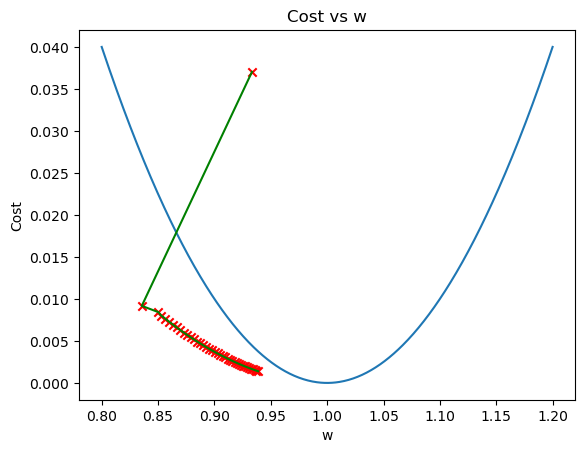

In [39]:
# preparation of generic data point
w = np.linspace(0.8,1.2,600).reshape(-1,1)
x = np.arange(1,600,600).reshape(-1,1)
y = np.arange(1,600,600).reshape(-1,1)
costw = (x*w - y)**2

# Use the variable i to change the number of data to plot
# use len(w_history) to plot all

#n = len(w_history)
n = 40


plt.close('all') 
fig = plt.figure()
# Plot the data points
plt.plot(w,costw)
# Plot w by cost
plt.scatter(w_history3c[:n],cost_history3c[:n], marker='x', color='red')
plt.plot(w_history3c[:n],cost_history3c[:n], c='g')
# Set the title
plt.title("Cost vs w")
# Set the y-axis label
plt.ylabel('Cost')
# Set the x-axis label
plt.xlabel('w')
plt.show()

### Using Too High Learning Rate

Let us set the learning rate higher and see what happen.

In [40]:
coef3d, intercept3d, cost_history3d, w_history3d, _ = my.compute_gradient_descent(x_train3, y_train3, alpha = 0.5, iterations = 200, 
                                                                                  printProgress=True, printProgressRate=10, storeHistory=True)

iteration 0: cost = 7.3148e+00: intercept = 1.0000e+00: weights = [[2.33333333]]
iteration 10: cost = 6.9027e+05: intercept = 2.0108e+02: weights = [[457.58753223]]
iteration 20: cost = 6.5215e+10: intercept = 6.1748e+04: weights = [[140367.98335286]]
iteration 30: cost = 6.1613e+15: intercept = 1.8979e+07: weights = [[43144772.40904628]]
iteration 40: cost = 5.8210e+20: intercept = 5.8337e+09: weights = [[1.3261457e+10]]
iteration 50: cost = 5.4995e+25: intercept = 1.7931e+12: weights = [[4.07618899e+12]]
iteration 60: cost = 5.1958e+30: intercept = 5.5115e+14: weights = [[1.2529028e+15]]
iteration 70: cost = 4.9088e+35: intercept = 1.6941e+17: weights = [[3.85106147e+17]]
iteration 80: cost = 4.6377e+40: intercept = 5.2071e+19: weights = [[1.1837051e+20]]
iteration 90: cost = 4.3815e+45: intercept = 1.6005e+22: weights = [[3.63836772e+22]]
iteration 100: cost = 4.1396e+50: intercept = 4.9195e+24: weights = [[1.11832919e+25]]
iteration 110: cost = 3.9109e+55: intercept = 1.5121e+27: w

The cost increase rapidly instead.

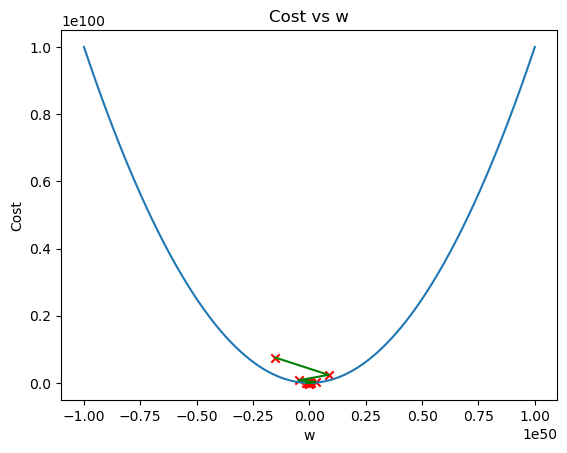

In [41]:
# preparation of generic data point
w = np.linspace(-1e50,1e50,600).reshape(-1,1)
x = np.arange(1,600,600).reshape(-1,1)
y = np.arange(1,600,600).reshape(-1,1)
costw = (x*w - y)**2

# Use the variable i to change the number of data to plot
# use len(w_history) to plot all

#n = len(w_history)
n = 198


plt.close('all') 
fig = plt.figure()
# Plot the data points
plt.plot(w,costw)
# Plot w by cost
plt.scatter(w_history3d[:n],cost_history3d[:n], marker='x', color='red')
plt.plot(w_history3d[:n],cost_history3d[:n], c='g')
# Set the title
plt.title("Cost vs w")
# Set the y-axis label
plt.ylabel('Cost')
# Set the x-axis label
plt.xlabel('w')
plt.show()

<div class="alert alert-block alert-warning">

<b> Please note that the lowest cost should be when w = 1. However the chart is so big that it looks similar to 0. Please note that the 1 on the x axis is 1e74 instead of 1. Please examine the scale closely.</b>

<b> Please also note that in this case the value of w and cost move from very low value to very high value. With high alpha, we will never converge.</b>

<b> Please use i in the previous cell to show the plot from 297 to 300.</b>
</div>

<div class="alert alert-block alert-info">

<b> Higher learning rate will cause `w` to move wildly from negative to positive. The value of cost will not descent but increase to a very large number. Not only that, the scale of the cost and learning parameters also increase significantly. Never set your learning rate ($\alpha$) too high. </b>

We can confirm our finding by examine the first 30 data. Both cost and w increase rapidly.
</div>

In [42]:
w_history3d[:30]

array([[ 2.33333333e+00],
       [-1.77777778e+00],
       [ 5.53703704e+00],
       [-7.41049383e+00],
       [ 1.55704733e+01],
       [-2.51595508e+01],
       [ 4.70837477e+01],
       [-8.10023744e+01],
       [ 1.46141558e+02],
       [-2.56621922e+02],
       [ 4.57587532e+02],
       [-8.08859481e+02],
       [ 1.43686212e+03],
       [-2.54531757e+03],
       [ 4.51603484e+03],
       [-8.00539165e+03],
       [ 1.41980511e+04],
       [-2.51738620e+04],
       [ 4.46418035e+04],
       [-7.91577730e+04],
       [ 1.40367983e+05],
       [-2.48902774e+05],
       [ 4.41365784e+05],
       [-7.82642611e+05],
       [ 1.38781198e+06],
       [-2.46091417e+06],
       [ 4.36378195e+06],
       [-7.73800841e+06],
       [ 1.37213104e+07],
       [-2.43311059e+07]])

In [43]:
cost_history3d[:30]

[7.314814814814815,
 22.980967078189302,
 72.24329846822133,
 227.1439325020322,
 714.2094546103482,
 2245.7216018971467,
 7061.352411501427,
 22203.442763277562,
 69815.66554236397,
 219525.75631430617,
 690268.5586482775,
 2170454.5936824903,
 6824696.117198147,
 21459318.822930068,
 67475878.26680678,
 212168624.06649938,
 667135073.9711595,
 2097714536.643559,
 6595975011.561113,
 20740136750.333485,
 65214509101.17346,
 205058059573.24445,
 644776881333.4194,
 2027412273222.8164,
 6374919207887.958,
 20045057161707.566,
 63028926879411.125,
 198185796703996.06,
 623167995392731.2,
 1959466101709622.2]

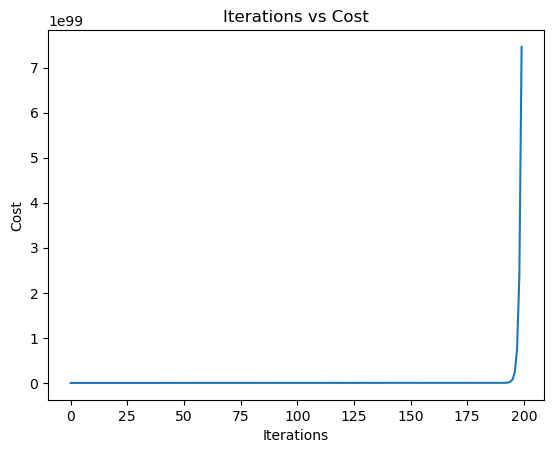

In [44]:
plt.close('all') 
fig = plt.figure()
# Plot iterations by cost
yplot1 = cost_history3d
plt.plot(np.arange(len(cost_history3d)), yplot1)
# Set the title
plt.title("Iterations vs Cost")
# Set the y-axis label
plt.ylabel('Cost')
# Set the x-axis label
plt.xlabel('Iterations')
plt.show()

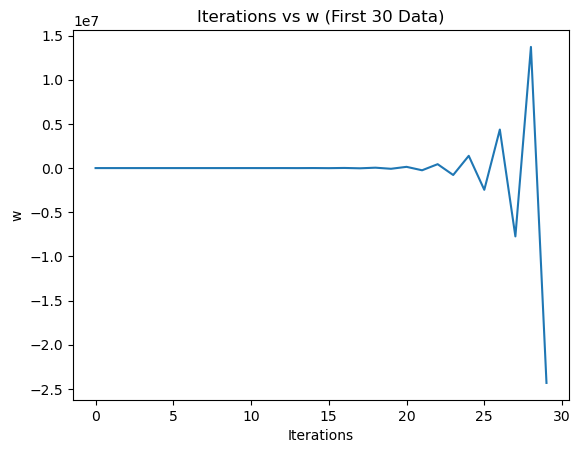

In [45]:
plt.close('all') 
fig = plt.figure()
# Plot iterations by cost
yplot1 = w_history3d[:30]
plt.plot(np.arange(len(w_history3d[:30])), yplot1)
# Set the title
plt.title("Iterations vs w (First 30 Data)")
# Set the y-axis label
plt.ylabel('w')
# Set the x-axis label
plt.xlabel('Iterations')
plt.show()

<div class="alert alert-block alert-warning">

<b> Please note that another reason for increasing cost and coefficient swinging up and down is that there is a bug in your code. You can use SciKit learn to double check your result and check your code if your result is different.</b>

<b>Another way is to set your learning rate to be very low such as 0.001 or 0.0001. This will cause gradient descent to converge slowing but you can use this method to check if your cost is indeed decreasing. If your cost still increase even if you use lower learning rate, then the problem could be in your code</b>

</div>

### Using Too Low Learning Rate

In [46]:
x_train4 = np.array([1.,2.,3.]).reshape(-1,1)
y_train4 = np.array([1.,2.,3.]).reshape(-1,1)

In [47]:
coef4, intercept4, cost_history4, _, _ = my.compute_gradient_descent(x_train4, y_train4, printProgress=True, storeHistory=True)

iteration 0: cost = 2.0827e+00: intercept = 2.0000e-02: weights = [[0.04666667]]
iteration 1000: cost = 8.7712e-04: intercept = 1.1058e-01: weights = [[0.95135473]]
iteration 2000: cost = 7.9144e-05: intercept = 3.3217e-02: weights = [[0.98538767]]
iteration 3000: cost = 7.1413e-06: intercept = 9.9780e-03: weights = [[0.99561067]]
iteration 4000: cost = 6.4437e-07: intercept = 2.9972e-03: weights = [[0.99868151]]
iteration 5000: cost = 5.8142e-08: intercept = 9.0033e-04: weights = [[0.99960394]]
iteration 6000: cost = 5.2463e-09: intercept = 2.7045e-04: weights = [[0.99988103]]
iteration 7000: cost = 4.7338e-10: intercept = 8.1238e-05: weights = [[0.99996426]]
iteration 8000: cost = 4.2713e-11: intercept = 2.4403e-05: weights = [[0.99998927]]
iteration 9000: cost = 3.8541e-12: intercept = 7.3302e-06: weights = [[0.99999678]]
iteration 9999: Last cost = 3.4860e-13: intercept = 2.2045e-06: weights = [[0.99999903]]
best w [[1.]]
best b 0.0


**With default of 10,000 iterations, we can reach conversion using learning rate of 0.01.**

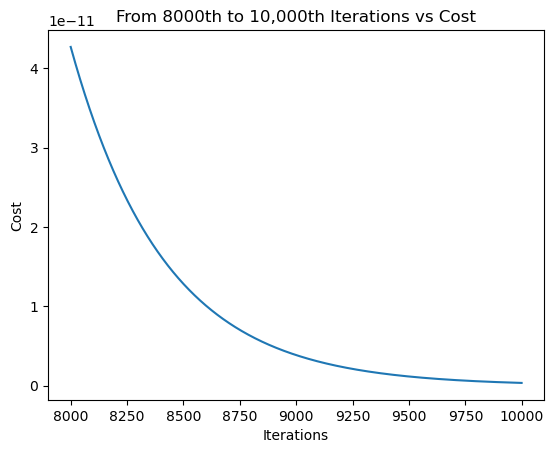

In [48]:
plt.close('all') 
fig = plt.figure()
# Plot iterations by cost
yplot1 = cost_history4[8000:]
plt.plot(8000 + np.arange(len(yplot1)), yplot1)
# Set the title
plt.title("From 8000th to 10,000th Iterations vs Cost")
# Set the y-axis label
plt.ylabel('Cost')
# Set the x-axis label
plt.xlabel('Iterations')
plt.show()

**Now, let us reduce the learning rate lower.**

In [49]:
coef4a, intercept4a, cost_history4a, _, _ = my.compute_gradient_descent(x_train4, y_train4, alpha = 0.001, printProgress=True, storeHistory=True)

iteration 0: cost = 2.3076e+00: intercept = 2.0000e-03: weights = [[0.00466667]]
iteration 1000: cost = 7.6940e-03: intercept = 3.2538e-01: weights = [[0.85304261]]
iteration 2000: cost = 6.0232e-03: intercept = 2.8977e-01: weights = [[0.87251298]]
iteration 3000: cost = 4.7361e-03: intercept = 2.5696e-01: weights = [[0.88696305]]
iteration 4000: cost = 3.7240e-03: intercept = 2.2786e-01: weights = [[0.89976569]]
iteration 5000: cost = 2.9282e-03: intercept = 2.0205e-01: weights = [[0.91111826]]
iteration 6000: cost = 2.3025e-03: intercept = 1.7916e-01: weights = [[0.92118503]]
iteration 7000: cost = 1.8105e-03: intercept = 1.5887e-01: weights = [[0.93011164]]
iteration 8000: cost = 1.4236e-03: intercept = 1.4088e-01: weights = [[0.93802721]]
iteration 9000: cost = 1.1194e-03: intercept = 1.2492e-01: weights = [[0.94504627]]
iteration 9999: Last cost = 8.8038e-04: intercept = 1.1079e-01: weights = [[0.95126449]]
best w [[0.9513]]
best b 0.1108


With default of 10,000 iterations, we **cannot** reach conversion using learning rate of 0.001.

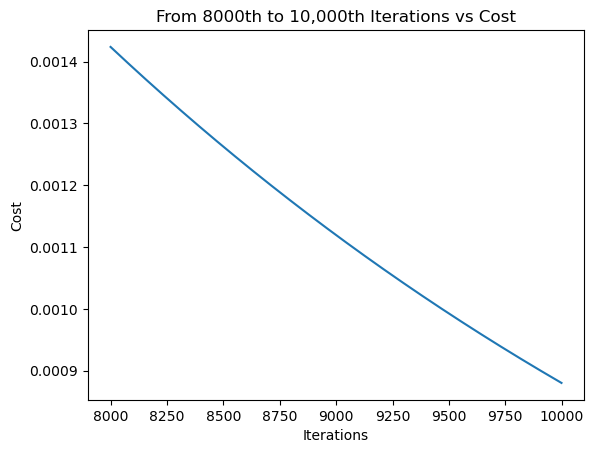

In [50]:
plt.close('all') 
fig = plt.figure()
# Plot iterations by cost
yplot1 = cost_history4a[8000:]
plt.plot(8000 + np.arange(len(yplot1)), yplot1)
# Set the title
plt.title("From 8000th to 10,000th Iterations vs Cost")
# Set the y-axis label
plt.ylabel('Cost')
# Set the x-axis label
plt.xlabel('Iterations')
plt.show()

**Let us try even lower learning rate.**

In [51]:
coef4b, intercept4b, cost_history4b, _, _ = my.compute_gradient_descent(x_train4, y_train4, alpha = 0.0001, printProgress=True, storeHistory=True)

iteration 0: cost = 2.3308e+00: intercept = 2.0000e-04: weights = [[0.00046667]]
iteration 1000: cost = 7.7473e-01: intercept = 1.5265e-01: weights = [[0.35897896]]
iteration 2000: cost = 2.6157e-01: intercept = 2.3837e-01: weights = [[0.56563364]]
iteration 3000: cost = 9.2242e-02: intercept = 2.8578e-01: weights = [[0.68508412]]
iteration 4000: cost = 3.6273e-02: intercept = 3.1123e-01: weights = [[0.75445367]]
iteration 5000: cost = 1.7681e-02: intercept = 3.2408e-01: weights = [[0.79505807]]
iteration 6000: cost = 1.1416e-02: intercept = 3.2973e-01: weights = [[0.81913666]]
iteration 7000: cost = 9.2175e-03: intercept = 3.3125e-01: weights = [[0.83371722]]
iteration 8000: cost = 8.3632e-03: intercept = 3.3043e-01: weights = [[0.84283513]]
iteration 9000: cost = 7.9551e-03: intercept = 3.2828e-01: weights = [[0.84880753]]
iteration 9999: Last cost = 7.6973e-03: intercept = 3.2540e-01: weights = [[0.8529615]]
best w [[0.853]]
best b 0.3254


If we lower the learning rate to 0.0001, we have even poorer result. This confirms that too low a learning rate will cause to gradient descent to converge slowly.

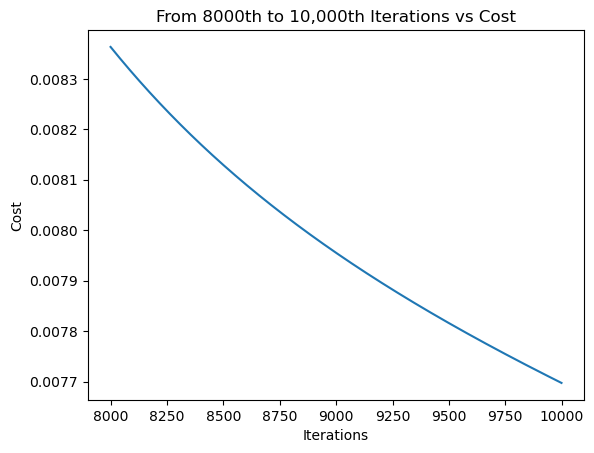

In [52]:
plt.close('all') 
fig = plt.figure()
# Plot iterations by cost
yplot1 = cost_history4b[8000:]
plt.plot(8000 + np.arange(len(yplot1)), yplot1)
# Set the title
plt.title("From 8000th to 10,000th Iterations vs Cost")
# Set the y-axis label
plt.ylabel('Cost')
# Set the x-axis label
plt.xlabel('Iterations')
plt.show()

Using very low learning rate, we need to increase our iterations to reach convergence. We will adjust from 10,000 iterations to 500,000 iterations.

In [53]:
coef4b, intercept4b, cost_history4b, _, _ = my.compute_gradient_descent(x_train4, y_train4, iterations = 500000, alpha = 0.0001, 
                                                                        printProgress=True, printProgressRate=10000)

iteration 0: cost = 2.3308e+00: intercept = 2.0000e-04: weights = [[0.00046667]]
iteration 10000: cost = 7.6971e-03: intercept = 3.2540e-01: weights = [[0.85296503]]
iteration 20000: cost = 6.0246e-03: intercept = 2.8981e-01: weights = [[0.87249712]]
iteration 30000: cost = 4.7373e-03: intercept = 2.5699e-01: weights = [[0.88694862]]
iteration 40000: cost = 3.7250e-03: intercept = 2.2789e-01: weights = [[0.89975224]]
iteration 50000: cost = 2.9290e-03: intercept = 2.0208e-01: weights = [[0.91110575]]
iteration 60000: cost = 2.3032e-03: intercept = 1.7919e-01: weights = [[0.92117343]]
iteration 70000: cost = 1.8110e-03: intercept = 1.5890e-01: weights = [[0.9301009]]
iteration 80000: cost = 1.4240e-03: intercept = 1.4090e-01: weights = [[0.93801729]]
iteration 90000: cost = 1.1197e-03: intercept = 1.2494e-01: weights = [[0.94503711]]
iteration 100000: cost = 8.8047e-04: intercept = 1.1079e-01: weights = [[0.9512619]]
iteration 110000: cost = 6.9233e-04: intercept = 9.8245e-02: weights =

## Learning Curve and Learning Rate Conclusion

<div class="alert alert-block alert-info">

- **Too high a learning rate caused coefficient and cost to increase rapidly and thus defeats the purpose of gradient descent.**
- **Too low a learning rate caused gradient descent to converge slowly. Thus, it requires more iterations for gradient descent to reach convergence.**
- **Use learning curve to check convergence and adjust the iterations and learning rate accordingly.**
- **Try using learning rate of 0.001, 0.01 and 0.1 for a start.**
- **Please note that different dataset/problem converge differently.**

</div>

## Adjusting Learning Rate $\alpha$ Using Housing Data

In [54]:
X2_train = df2[['sqft','rm']]
y2_train = df2['price']
X2_train5 = X2_train.to_numpy()
y2_train5 = y2_train.to_numpy().reshape(-1,1)

In [55]:
# SciKit Learn Scaling with Regression
std_scaler5 = StandardScaler()
normalized_arr5 = std_scaler5.fit_transform(X2_train5)
reg5 = LinearRegression().fit(normalized_arr5, y2_train5)
print('w',reg5.coef_)
print('b',reg5.intercept_)

w [[109447.79646964  -6578.35485416]]
b [340412.65957447]


In [56]:
X2_norm5, avg5, stddev5 = my.std_norm(X2_train5)
coef5, intercept5, cost_history5, _, _ = my.compute_gradient_descent(X2_norm5, y2_train5, iterations= 4000, printProgress=True, 
                                                                     printProgressRate=500, storeHistory=True)

iteration 0: cost = 6.4298e+10: intercept = 3.4041e+03: weights = [[1057.64133493  547.08821756]]
iteration 500: cost = 2.0636e+09: intercept = 3.3820e+05: weights = [[103060.57737633   -230.15986939]]
iteration 1000: cost = 2.0435e+09: intercept = 3.4040e+05: weights = [[108745.75920605  -5876.33262918]]
iteration 1500: cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109370.39878515  -6500.95717547]]
iteration 2000: cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109439.26349627  -6569.82188079]]
iteration 2500: cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109446.85572267  -6577.41410719]]
iteration 3000: cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109447.69275376  -6578.25113828]]
iteration 3500: cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109447.78503513  -6578.34341965]]
iteration 3999: Last cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109447.79520343  -6578.35358795]]
best w [[109447.7952]
 [ -6578.3536]]
best b 340412.6596


In [57]:
print('Last cost is {0:,.2f}'.format(cost_history5[-1]) )

Last cost is 2,043,280,050.60


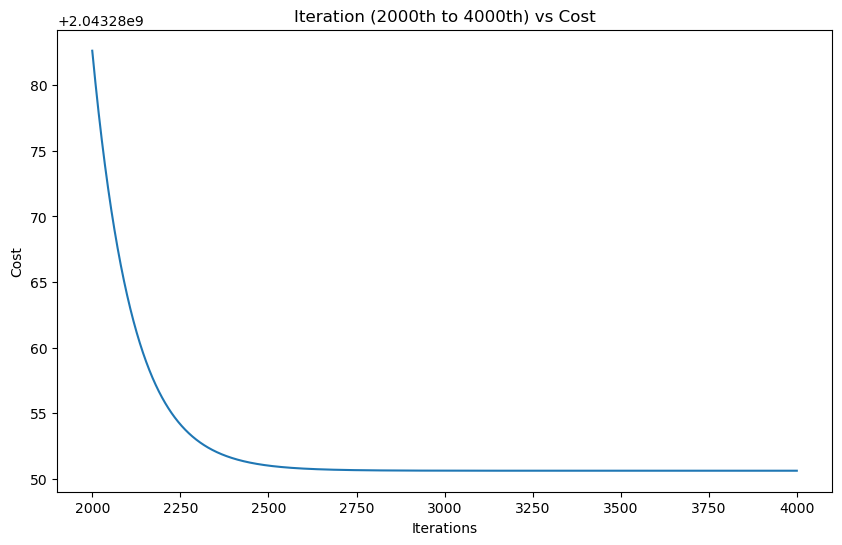

In [59]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6))
yplot1 = cost_history5[2000:]
ax1.plot(2000 + np.arange(len(yplot1)), yplot1)
ax1.set_title('Iteration (2000th to 4000th) vs Cost')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Cost')
plt.show()

If we reduce the iterations further, our accuracy may suffer

In [60]:
coef5h, intercept5h, cost_history5h, _, _ = my.compute_gradient_descent(X2_norm5, y2_train5, iterations= 400, printProgress=True, 
                                                                        printProgressRate=50, storeHistory=True)

iteration 0: cost = 6.4298e+10: intercept = 3.4041e+03: weights = [[1057.64133493  547.08821756]]
iteration 50: cost = 2.4604e+10: intercept = 1.3652e+05: weights = [[40051.03312523 16681.80512568]]
iteration 100: cost = 1.0432e+10: intercept = 2.1706e+05: weights = [[61776.98110696 20072.44152407]]
iteration 150: cost = 5.2549e+09: intercept = 2.6578e+05: weights = [[74852.11318709 18440.5246352 ]]
iteration 200: cost = 3.3216e+09: intercept = 2.9526e+05: weights = [[83357.28076018 15148.93116645]]
iteration 250: cost = 2.5798e+09: intercept = 3.1310e+05: weights = [[89276.12934437 11605.40756628]]
iteration 300: cost = 2.2843e+09: intercept = 3.2389e+05: weights = [[93612.19370029  8351.55066859]]
iteration 350: cost = 2.1603e+09: intercept = 3.3041e+05: weights = [[96902.72178956  5554.08057792]]
iteration 399: Last cost = 2.1054e+09: intercept = 3.3430e+05: weights = [[99411.44947359  3267.01285407]]
best w [[99411.4495]
 [ 3267.0129]]
best b 334302.064


In [61]:
print('Last cost is {0:,.2f}'.format(cost_history5h[-1]) )

Last cost is 2,105,448,288.63


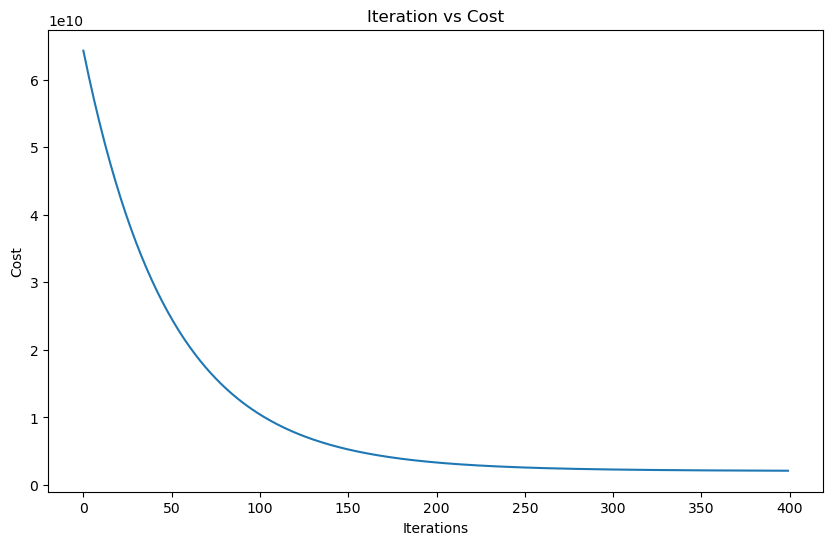

In [62]:
plt.close('all')
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 6))
yplot1 = cost_history5h
ax1.plot(np.arange(len(yplot1)), yplot1)
ax1.set_title('Iteration vs Cost')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Cost')
plt.show()

From 4000 iterations to 400 iterations, the accuracy reduced. The cost is also higher. Let us adjust the learning rate higher from the default 0.01 to 0.1.

In [63]:
coef5ha, intercept5ha, cost_history5ha, _, _ = my.compute_gradient_descent(X2_norm5, y2_train5, iterations= 400, alpha= 0.1, 
                                                                           printProgress=True, printProgressRate=50, storeHistory=True)

iteration 0: cost = 5.3268e+10: intercept = 3.4041e+04: weights = [[10576.41334928  5470.88217559]]
iteration 50: cost = 2.0596e+09: intercept = 3.3883e+05: weights = [[103593.54385865   -742.1256641 ]]
iteration 100: cost = 2.0434e+09: intercept = 3.4040e+05: weights = [[108831.73527397  -5962.29739997]]
iteration 150: cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109382.86687982  -6513.42526511]]
iteration 200: cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109440.95321378  -6571.5115983 ]]
iteration 250: cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109447.0752245   -6577.63360902]]
iteration 300: cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109447.72045399  -6578.27883851]]
iteration 350: cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109447.78845797  -6578.34684249]]
iteration 399: Last cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109447.79558639  -6578.3539709 ]]
best w [[109447.7956]
 [ -6578.354 ]]
best b 340412.6596


As you can see, with higher learning rate, we can achieve the same result faster. But please do not set the learning rate too high. If learning rate too high, cost will increase instead. If alpha is too small, it take a long while to converge. Cost decrease slowly.

In [64]:
coef5a, intercept5a, cost_history5a, w_history5a, _ = my.compute_gradient_descent(X2_norm5, y2_train5, iterations= 400, alpha= 1.3, 
                                                                                  printProgress=True, printProgressRate=100, storeHistory=True)

iteration 0: cost = 1.1890e+10: intercept = 4.4254e+05: weights = [[137493.37354066  71121.46828263]]
iteration 100: cost = 1.0850e+12: intercept = 3.4041e+05: weights = [[942633.41231135 826607.26098754]]
iteration 200: cost = 2.6892e+14: intercept = 3.4041e+05: weights = [[13239064.19739644 13123038.04607264]]
iteration 300: cost = 6.6779e+16: intercept = 3.4041e+05: weights = [[2.07010315e+08 2.06894289e+08]]
iteration 399: Last cost = 1.5693e+19: intercept = 3.4041e+05: weights = [[-3.17162985e+09 -3.17174588e+09]]
best w [[-3.17162985e+09]
 [-3.17174588e+09]]
best b 340412.6596


In [65]:
coef5b, intercept5b, cost_history5b, w_history5b, _ = my.compute_gradient_descent(X2_norm5, y2_train5, iterations= 400, alpha= 1, 
                                                                                  printProgress=True, printProgressRate=100, storeHistory=True)

iteration 0: cost = 3.8017e+09: intercept = 3.4041e+05: weights = [[105764.13349282  54708.82175587]]
iteration 100: cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109447.79646964  -6578.35485416]]
iteration 200: cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109447.79646964  -6578.35485416]]
iteration 300: cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109447.79646964  -6578.35485416]]
iteration 399: Last cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109447.79646964  -6578.35485416]]
best w [[109447.7965]
 [ -6578.3549]]
best b 340412.6596


In [66]:
coef5c, intercept5c, cost_history5c, w_history5c, _ = my.compute_gradient_descent(X2_norm5, y2_train5, iterations= 400, alpha= 0.1, 
                                                                                  printProgress=True, printProgressRate=100, storeHistory=True)

iteration 0: cost = 5.3268e+10: intercept = 3.4041e+04: weights = [[10576.41334928  5470.88217559]]
iteration 100: cost = 2.0434e+09: intercept = 3.4040e+05: weights = [[108831.73527397  -5962.29739997]]
iteration 200: cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109440.95321378  -6571.5115983 ]]
iteration 300: cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109447.72045399  -6578.27883851]]
iteration 399: Last cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109447.79558639  -6578.3539709 ]]
best w [[109447.7956]
 [ -6578.354 ]]
best b 340412.6596


In [67]:
coef5d, intercept5d, cost_history5d, w_history5d, _ = my.compute_gradient_descent(X2_norm5, y2_train5, iterations= 400, alpha= 0.01, 
                                                                                  printProgress=True, printProgressRate=100, storeHistory=True)

iteration 0: cost = 6.4298e+10: intercept = 3.4041e+03: weights = [[1057.64133493  547.08821756]]
iteration 100: cost = 1.0432e+10: intercept = 2.1706e+05: weights = [[61776.98110696 20072.44152407]]
iteration 200: cost = 3.3216e+09: intercept = 2.9526e+05: weights = [[83357.28076018 15148.93116645]]
iteration 300: cost = 2.2843e+09: intercept = 3.2389e+05: weights = [[93612.19370029  8351.55066859]]
iteration 399: Last cost = 2.1054e+09: intercept = 3.3430e+05: weights = [[99411.44947359  3267.01285407]]
best w [[99411.4495]
 [ 3267.0129]]
best b 334302.064


In [68]:
coef5e, intercept5e, cost_history5e, w_history5e, _ = my.compute_gradient_descent(X2_norm5, y2_train5, iterations= 400, alpha= 0.001, 
                                                                                  printProgress=True, printProgressRate=100, storeHistory=True)

iteration 0: cost = 6.5462e+10: intercept = 3.4041e+02: weights = [[105.76413349  54.70882176]]
iteration 100: cost = 5.3747e+10: intercept = 3.2718e+04: weights = [[10025.5084326   4980.74545043]]
iteration 200: cost = 4.4241e+10: intercept = 6.2013e+04: weights = [[18764.82111594  8941.37176665]]
iteration 300: cost = 3.6517e+10: intercept = 8.8519e+04: weights = [[26483.41378857 12087.04089184]]
iteration 399: Last cost = 3.0292e+10: intercept = 1.1227e+05: weights = [[33254.00585532 14524.42608546]]
best w [[33254.0059]
 [14524.4261]]
best b 112272.8929


In [69]:
coef5f, intercept5f, cost_history5f, w_history5f, _ = my.compute_gradient_descent(X2_norm5, y2_train5, iterations= 400, alpha= 0.0001, 
                                                                                  printProgress=True, printProgressRate=100, storeHistory=True)

iteration 0: cost = 6.5579e+10: intercept = 3.4041e+01: weights = [[10.57641335  5.47088218]]
iteration 100: cost = 6.4292e+10: intercept = 3.4210e+03: weights = [[1061.36282282  546.83706217]]
iteration 200: cost = 6.3032e+10: intercept = 6.7743e+03: weights = [[2098.70773996 1076.99849032]]
iteration 300: cost = 6.1798e+10: intercept = 1.0094e+04: weights = [[3122.80683507 1596.14101593]]
iteration 399: Last cost = 6.0601e+10: intercept = 1.3348e+04: weights = [[4123.80633168 2099.41753612]]
best w [[4123.8063]
 [2099.4175]]
best b 13348.4255


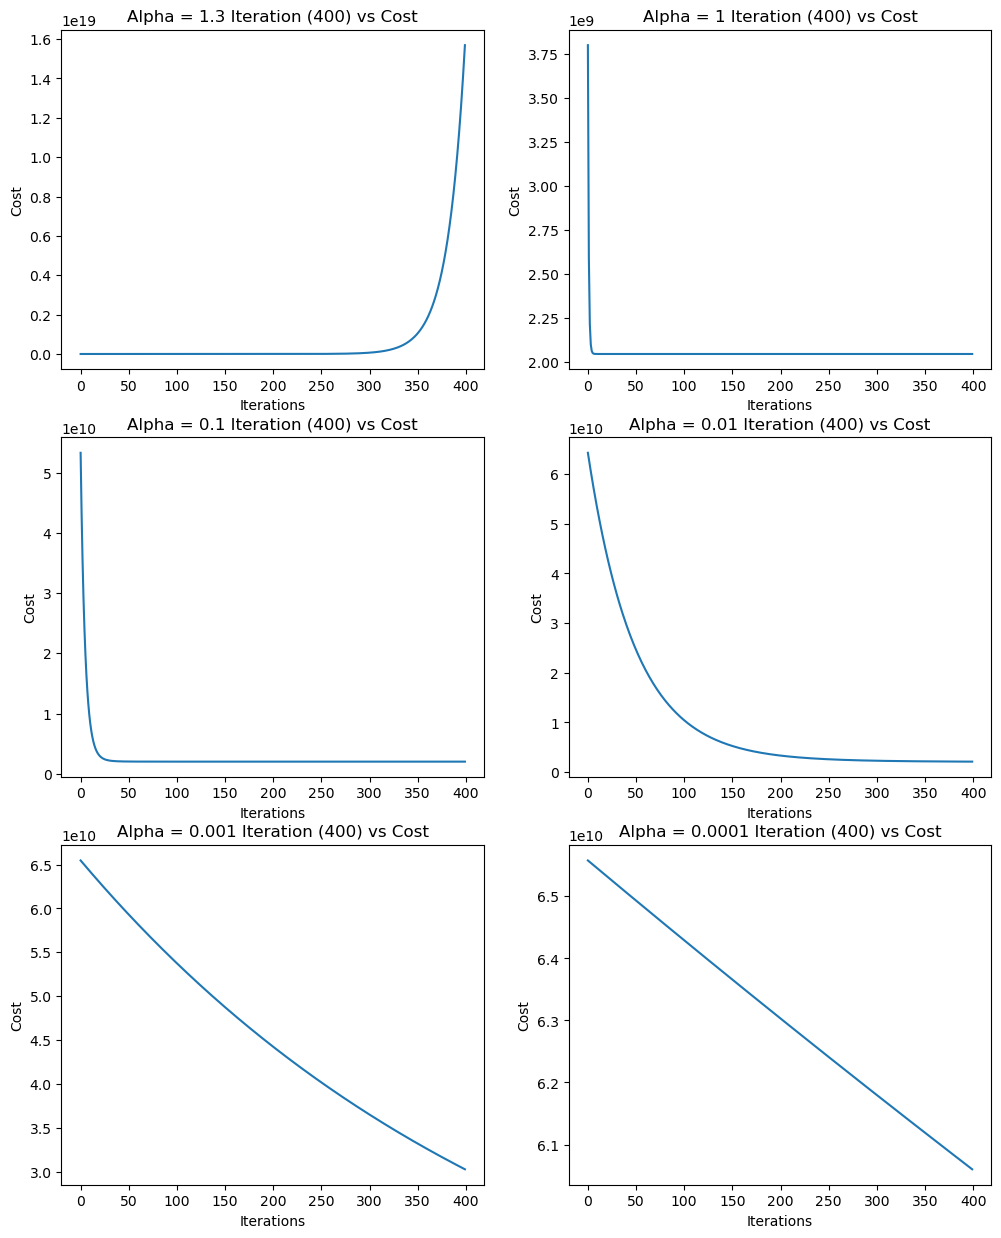

In [71]:
plt.close('all')
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(12, 15))
ax1.plot(cost_history5a)
ax1.set_title('Alpha = 1.3 Iteration (400) vs Cost')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Cost')
ax2.plot(cost_history5b)
ax2.set_title('Alpha = 1 Iteration (400) vs Cost')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Cost')
ax3.plot(cost_history5c)
ax3.set_title('Alpha = 0.1 Iteration (400) vs Cost')
ax3.set_xlabel('Iterations')
ax3.set_ylabel('Cost')
ax4.plot(cost_history5d)
ax4.set_title('Alpha = 0.01 Iteration (400) vs Cost')
ax4.set_xlabel('Iterations')
ax4.set_ylabel('Cost')
ax5.plot(cost_history5e)
ax5.set_title('Alpha = 0.001 Iteration (400) vs Cost')
ax5.set_xlabel('Iterations')
ax5.set_ylabel('Cost')
ax6.plot(cost_history5f)
ax6.set_title('Alpha = 0.0001 Iteration (400) vs Cost')
ax6.set_xlabel('Iterations')
ax6.set_ylabel('Cost')
plt.show()

Based on the chart above we can see that with smaller alpha, it will take more iterations to converge

In [72]:
w_history5e[:10,0]

array([ 105.76413349,  211.39186771,  316.88340284,  422.23893878,
        527.45867512,  632.54281113,  737.49154579,  842.30507777,
        946.98360543, 1051.52732683])

In [73]:
w_history5e[-10:,0]

array([32671.15518391, 32736.2250934 , 32801.21756537, 32866.13271004,
       32930.97063744, 32995.73145746, 33060.4152798 , 33125.022214  ,
       33189.55236944, 33254.00585532])

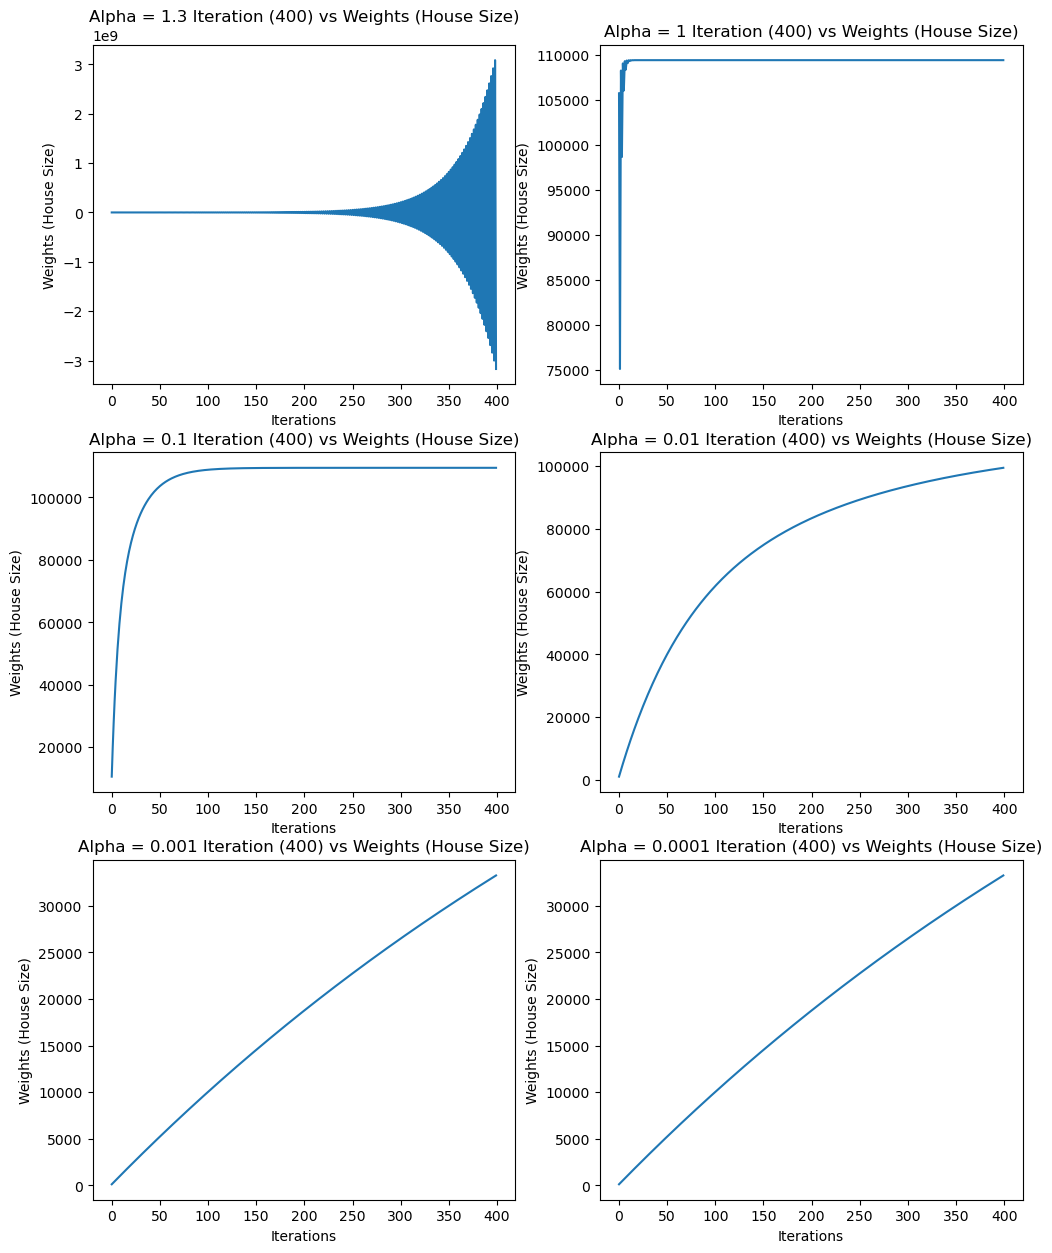

In [75]:
plt.close('all')
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(12, 15))
ax1.plot(w_history5a[:,0])
ax1.set_title('Alpha = 1.3 Iteration (400) vs Weights (House Size)')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Weights (House Size)')
ax2.plot(w_history5b[:,0])
ax2.set_title('Alpha = 1 Iteration (400) vs Weights (House Size)')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Weights (House Size)')
ax3.plot(w_history5c[:,0])
ax3.set_title('Alpha = 0.1 Iteration (400) vs Weights (House Size)')
ax3.set_xlabel('Iterations')
ax3.set_ylabel('Weights (House Size)')
ax4.plot(w_history5d[:,0])
ax4.set_title('Alpha = 0.01 Iteration (400) vs Weights (House Size)')
ax4.set_xlabel('Iterations')
ax4.set_ylabel('Weights (House Size)')
ax5.plot(w_history5e[:,0])
ax5.set_title('Alpha = 0.001 Iteration (400) vs Weights (House Size)')
ax5.set_xlabel('Iterations')
ax5.set_ylabel('Weights (House Size)')
ax6.plot(w_history5e[:,0])
ax6.set_title('Alpha = 0.0001 Iteration (400) vs Weights (House Size)')
ax6.set_xlabel('Iterations')
ax6.set_ylabel('Weights (House Size)')
plt.show()

As alpha increase, our number of iterations can be reduce and when we reduce alpha our number of iterations need to be increase

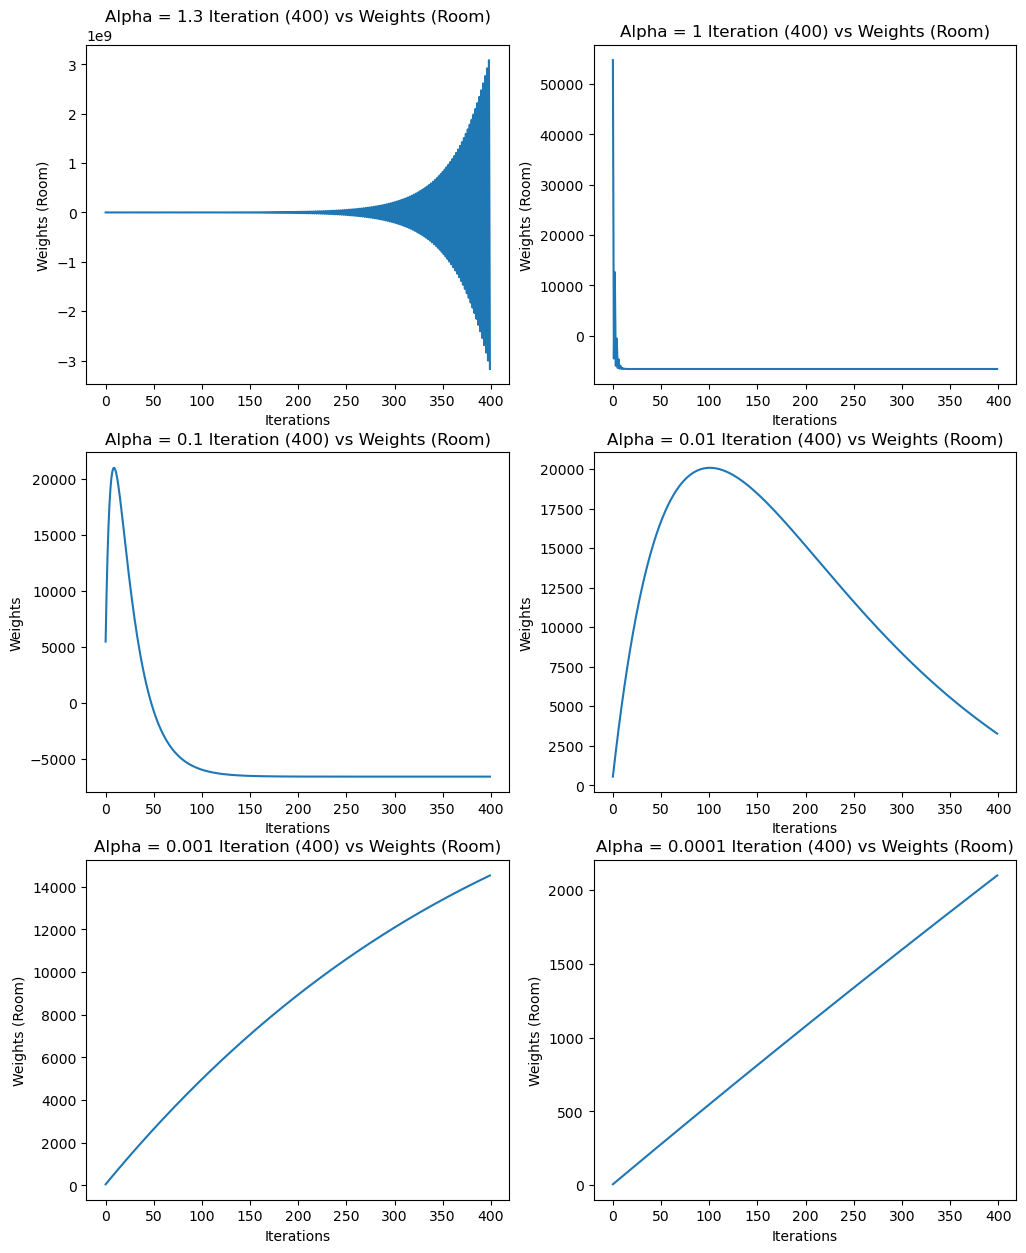

In [76]:
plt.close('all')
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(12, 15))
ax1.plot(w_history5a[:,1])
ax1.set_title('Alpha = 1.3 Iteration (400) vs Weights (Room)')
ax1.set_xlabel('Iterations')
ax1.set_ylabel('Weights (Room)')
ax2.plot(w_history5b[:,1])
ax2.set_title('Alpha = 1 Iteration (400) vs Weights (Room)')
ax2.set_xlabel('Iterations')
ax2.set_ylabel('Weights (Room)')
ax3.plot(w_history5c[:,1])
ax3.set_title('Alpha = 0.1 Iteration (400) vs Weights (Room)')
ax3.set_xlabel('Iterations')
ax3.set_ylabel('Weights')
ax4.plot(w_history5d[:,1])
ax4.set_title('Alpha = 0.01 Iteration (400) vs Weights (Room)')
ax4.set_xlabel('Iterations')
ax4.set_ylabel('Weights')
ax5.plot(w_history5e[:,1])
ax5.set_title('Alpha = 0.001 Iteration (400) vs Weights (Room)')
ax5.set_xlabel('Iterations')
ax5.set_ylabel('Weights (Room)')
ax6.plot(w_history5f[:,1])
ax6.set_title('Alpha = 0.0001 Iteration (400) vs Weights (Room)')
ax6.set_xlabel('Iterations')
ax6.set_ylabel('Weights (Room)')
plt.show()

In [77]:
coef5e, intercept5e, cost_history5e, w_history5e, _ = my.compute_gradient_descent(X2_norm5, y2_train5, iterations= 40, alpha= 1, 
                                                                                  printProgress=True, printProgressRate=10, storeHistory=True)

iteration 0: cost = 3.8017e+09: intercept = 3.4041e+05: weights = [[105764.13349282  54708.82175587]]
iteration 10: cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109436.63025908  -6392.5763172 ]]
iteration 20: cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109447.76262174  -6577.79170757]]
iteration 30: cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109447.79636704  -6578.35314711]]
iteration 39: Last cost = 2.0433e+09: intercept = 3.4041e+05: weights = [[109447.7964604   -6578.35485361]]
best w [[109447.7965]
 [ -6578.3549]]
best b 340412.6596


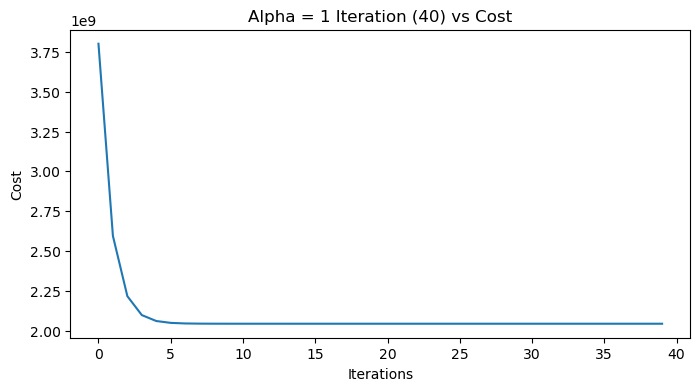

In [78]:
figure = plt.subplots(figsize=(8, 4))
plt.plot(cost_history5e)
plt.title('Alpha = 1 Iteration (40) vs Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()

In [79]:
my.prediction(X2_norm5[:10], intercept5e, coef5e)

array([[356283.11033756],
       [286120.9306386 ],
       [397489.4698433 ],
       [269244.18573311],
       [472277.85513523],
       [330979.02101927],
       [276933.02615421],
       [262037.48403558],
       [255494.58235731],
       [271364.59919398]])

In [80]:
reg5.predict(X2_norm5[:10])

array([[356283.1103389 ],
       [286120.93063401],
       [397489.46984812],
       [269244.1857271 ],
       [472277.85514636],
       [330979.02101847],
       [276933.02614885],
       [262037.48402897],
       [255494.58235014],
       [271364.59918815]])

## End Note 12